# Task 1

- Load the data.

- Preprocess the data by dropping the yearresale value feature and the missing values containing records.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster  import AgglomerativeClustering

In [2]:
df=pd.read_csv('DS2_C6_S3_CarSales_Data_Practice.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [4]:
df=df.drop(["__year_resale_value","Latest_Launch"],axis=1)
df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [5]:
df.isna().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Power_perf_factor     2
dtype: int64

In [6]:
df.shape

(157, 14)

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isna().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Power_perf_factor     0
dtype: int64

In [9]:
df.shape

(152, 14)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Manufacturer"]=le.fit_transform(df["Manufacturer"])
df["Model"]=le.fit_transform(df["Model"])
df["Vehicle_type"]=le.fit_transform(df["Vehicle_type"])
df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,0,78,16.919,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,0,139,39.384,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,0,112,8.588,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1,8,20.397,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,1,9,18.780,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


In [11]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(df)

# Task 2

Compute the Dendogram to choose the
number of clusters with threshold cut value.

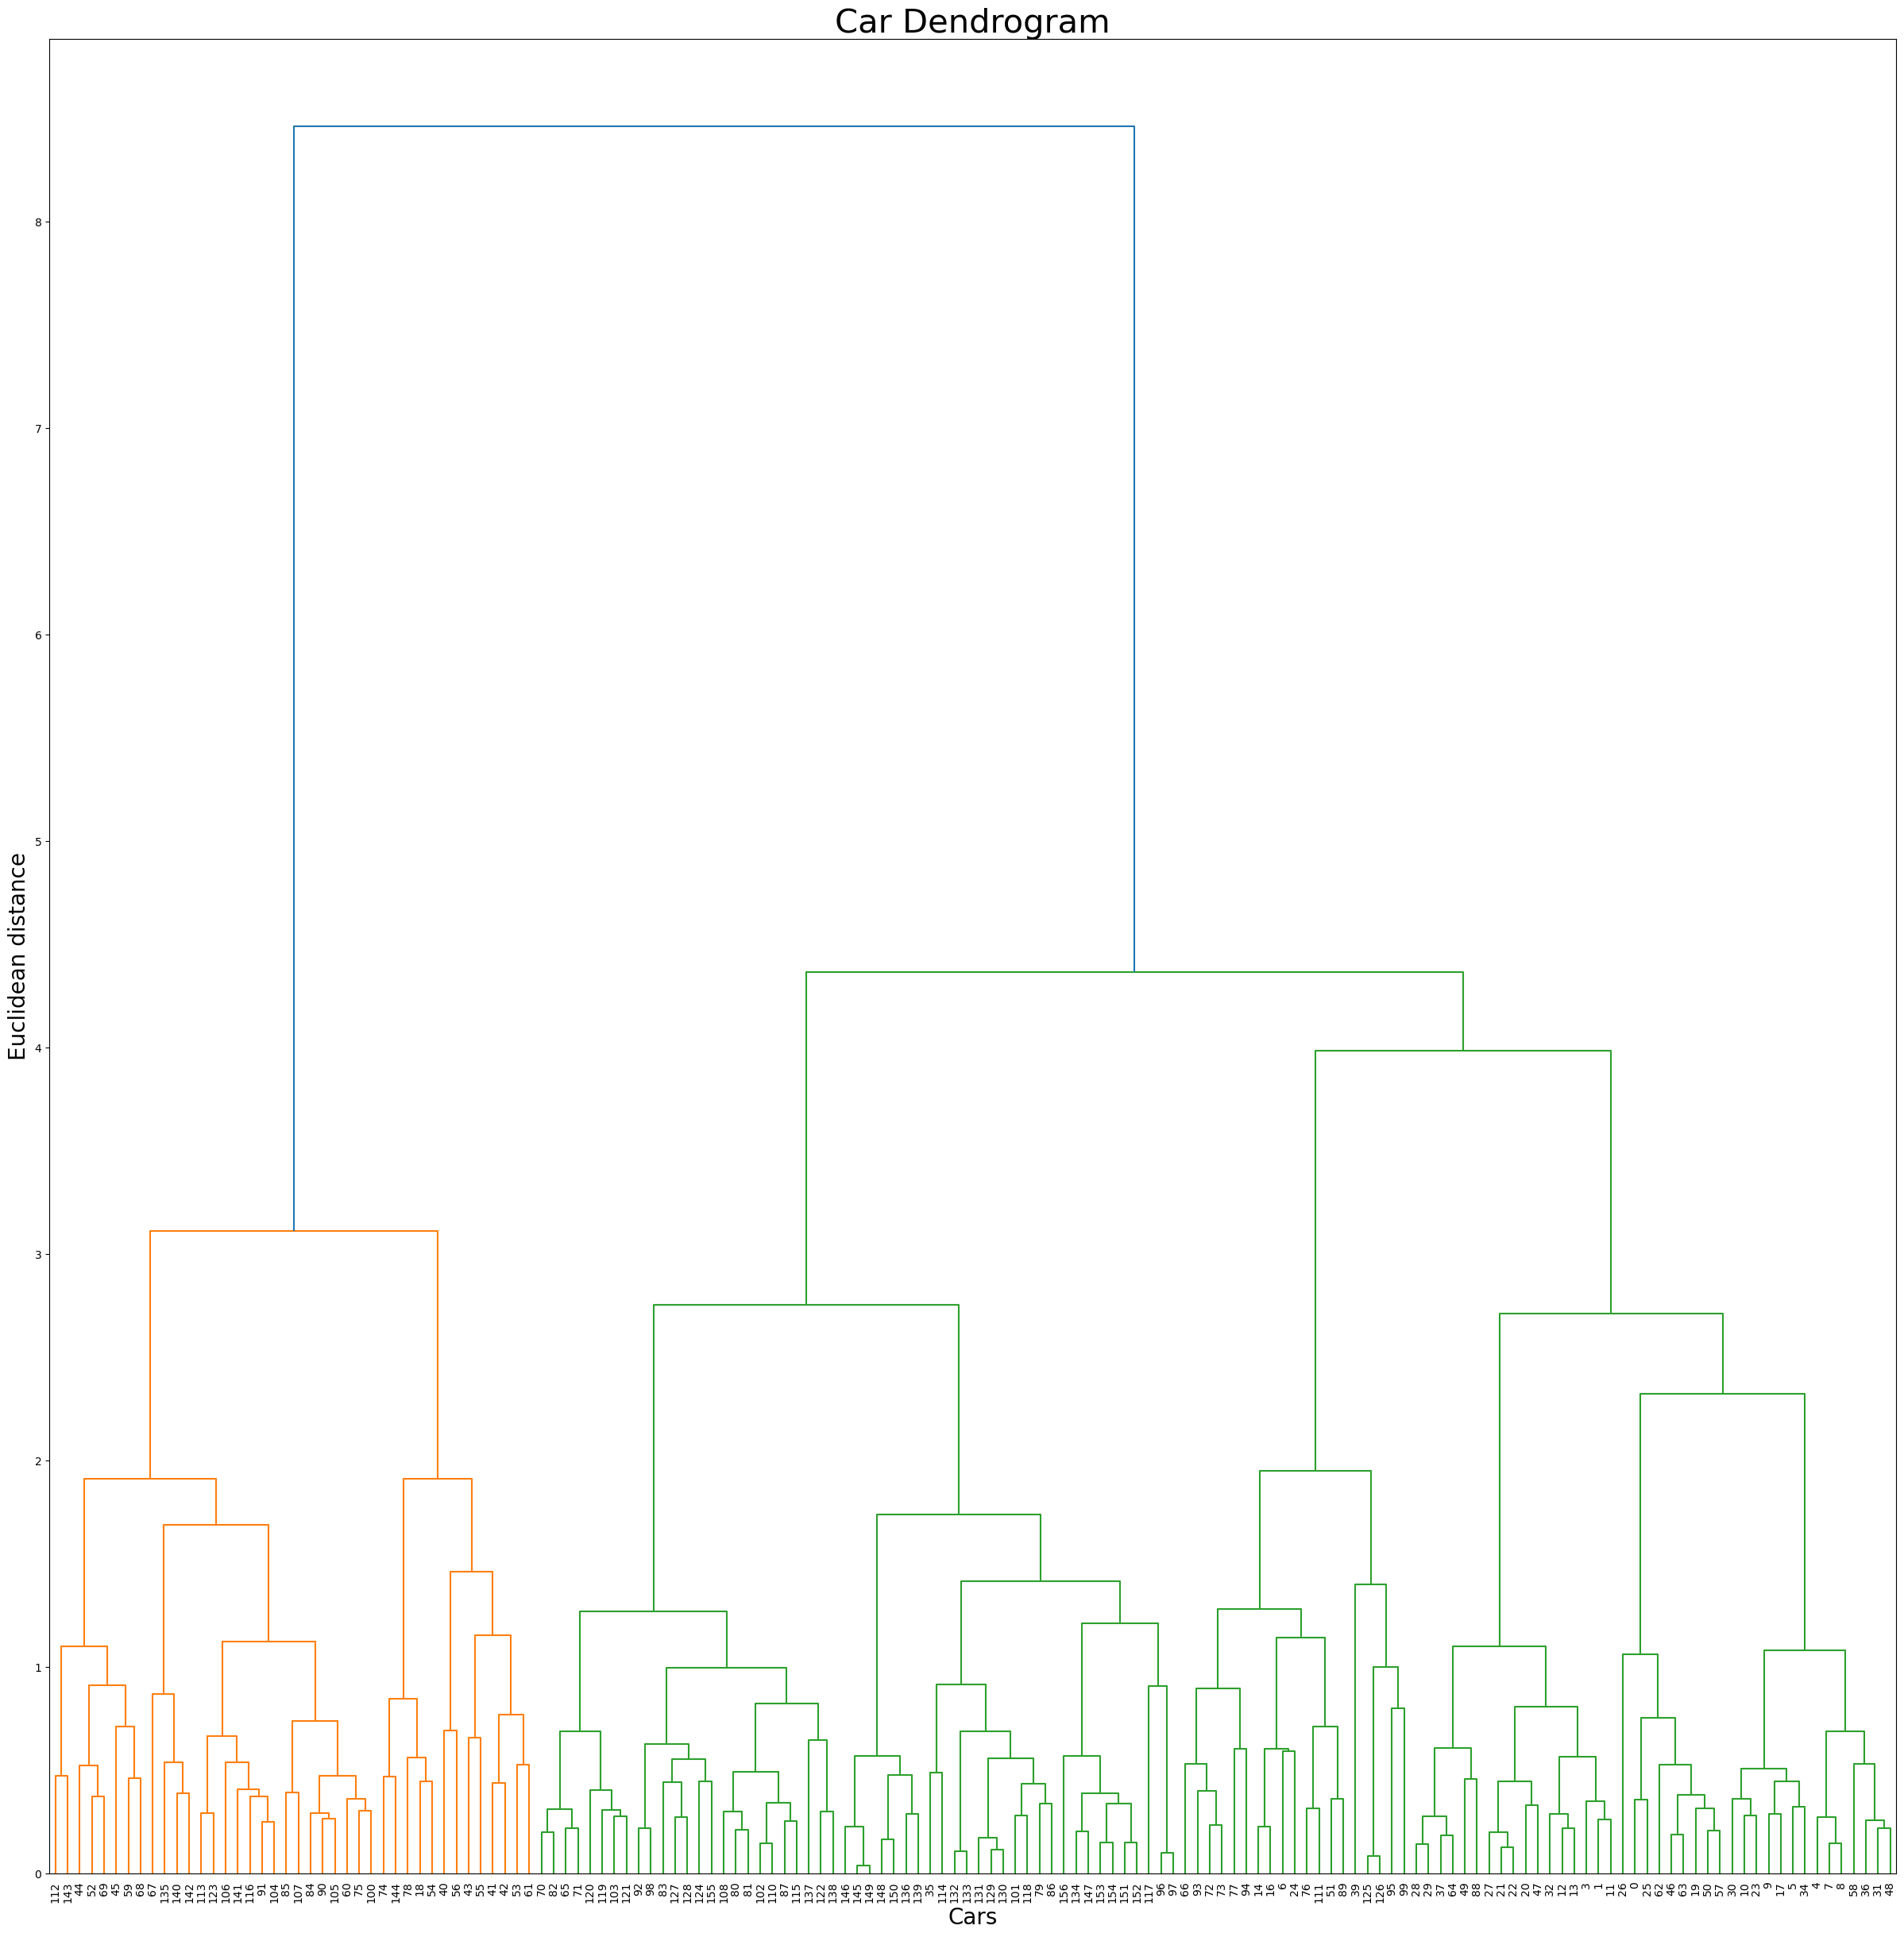

In [12]:
plt.figure(figsize=(30, 30))
dendrogrm = dendrogram(linkage(x, method = 'ward'),labels=df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Car Dendrogram',fontsize=30)
plt.xlabel('Cars',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

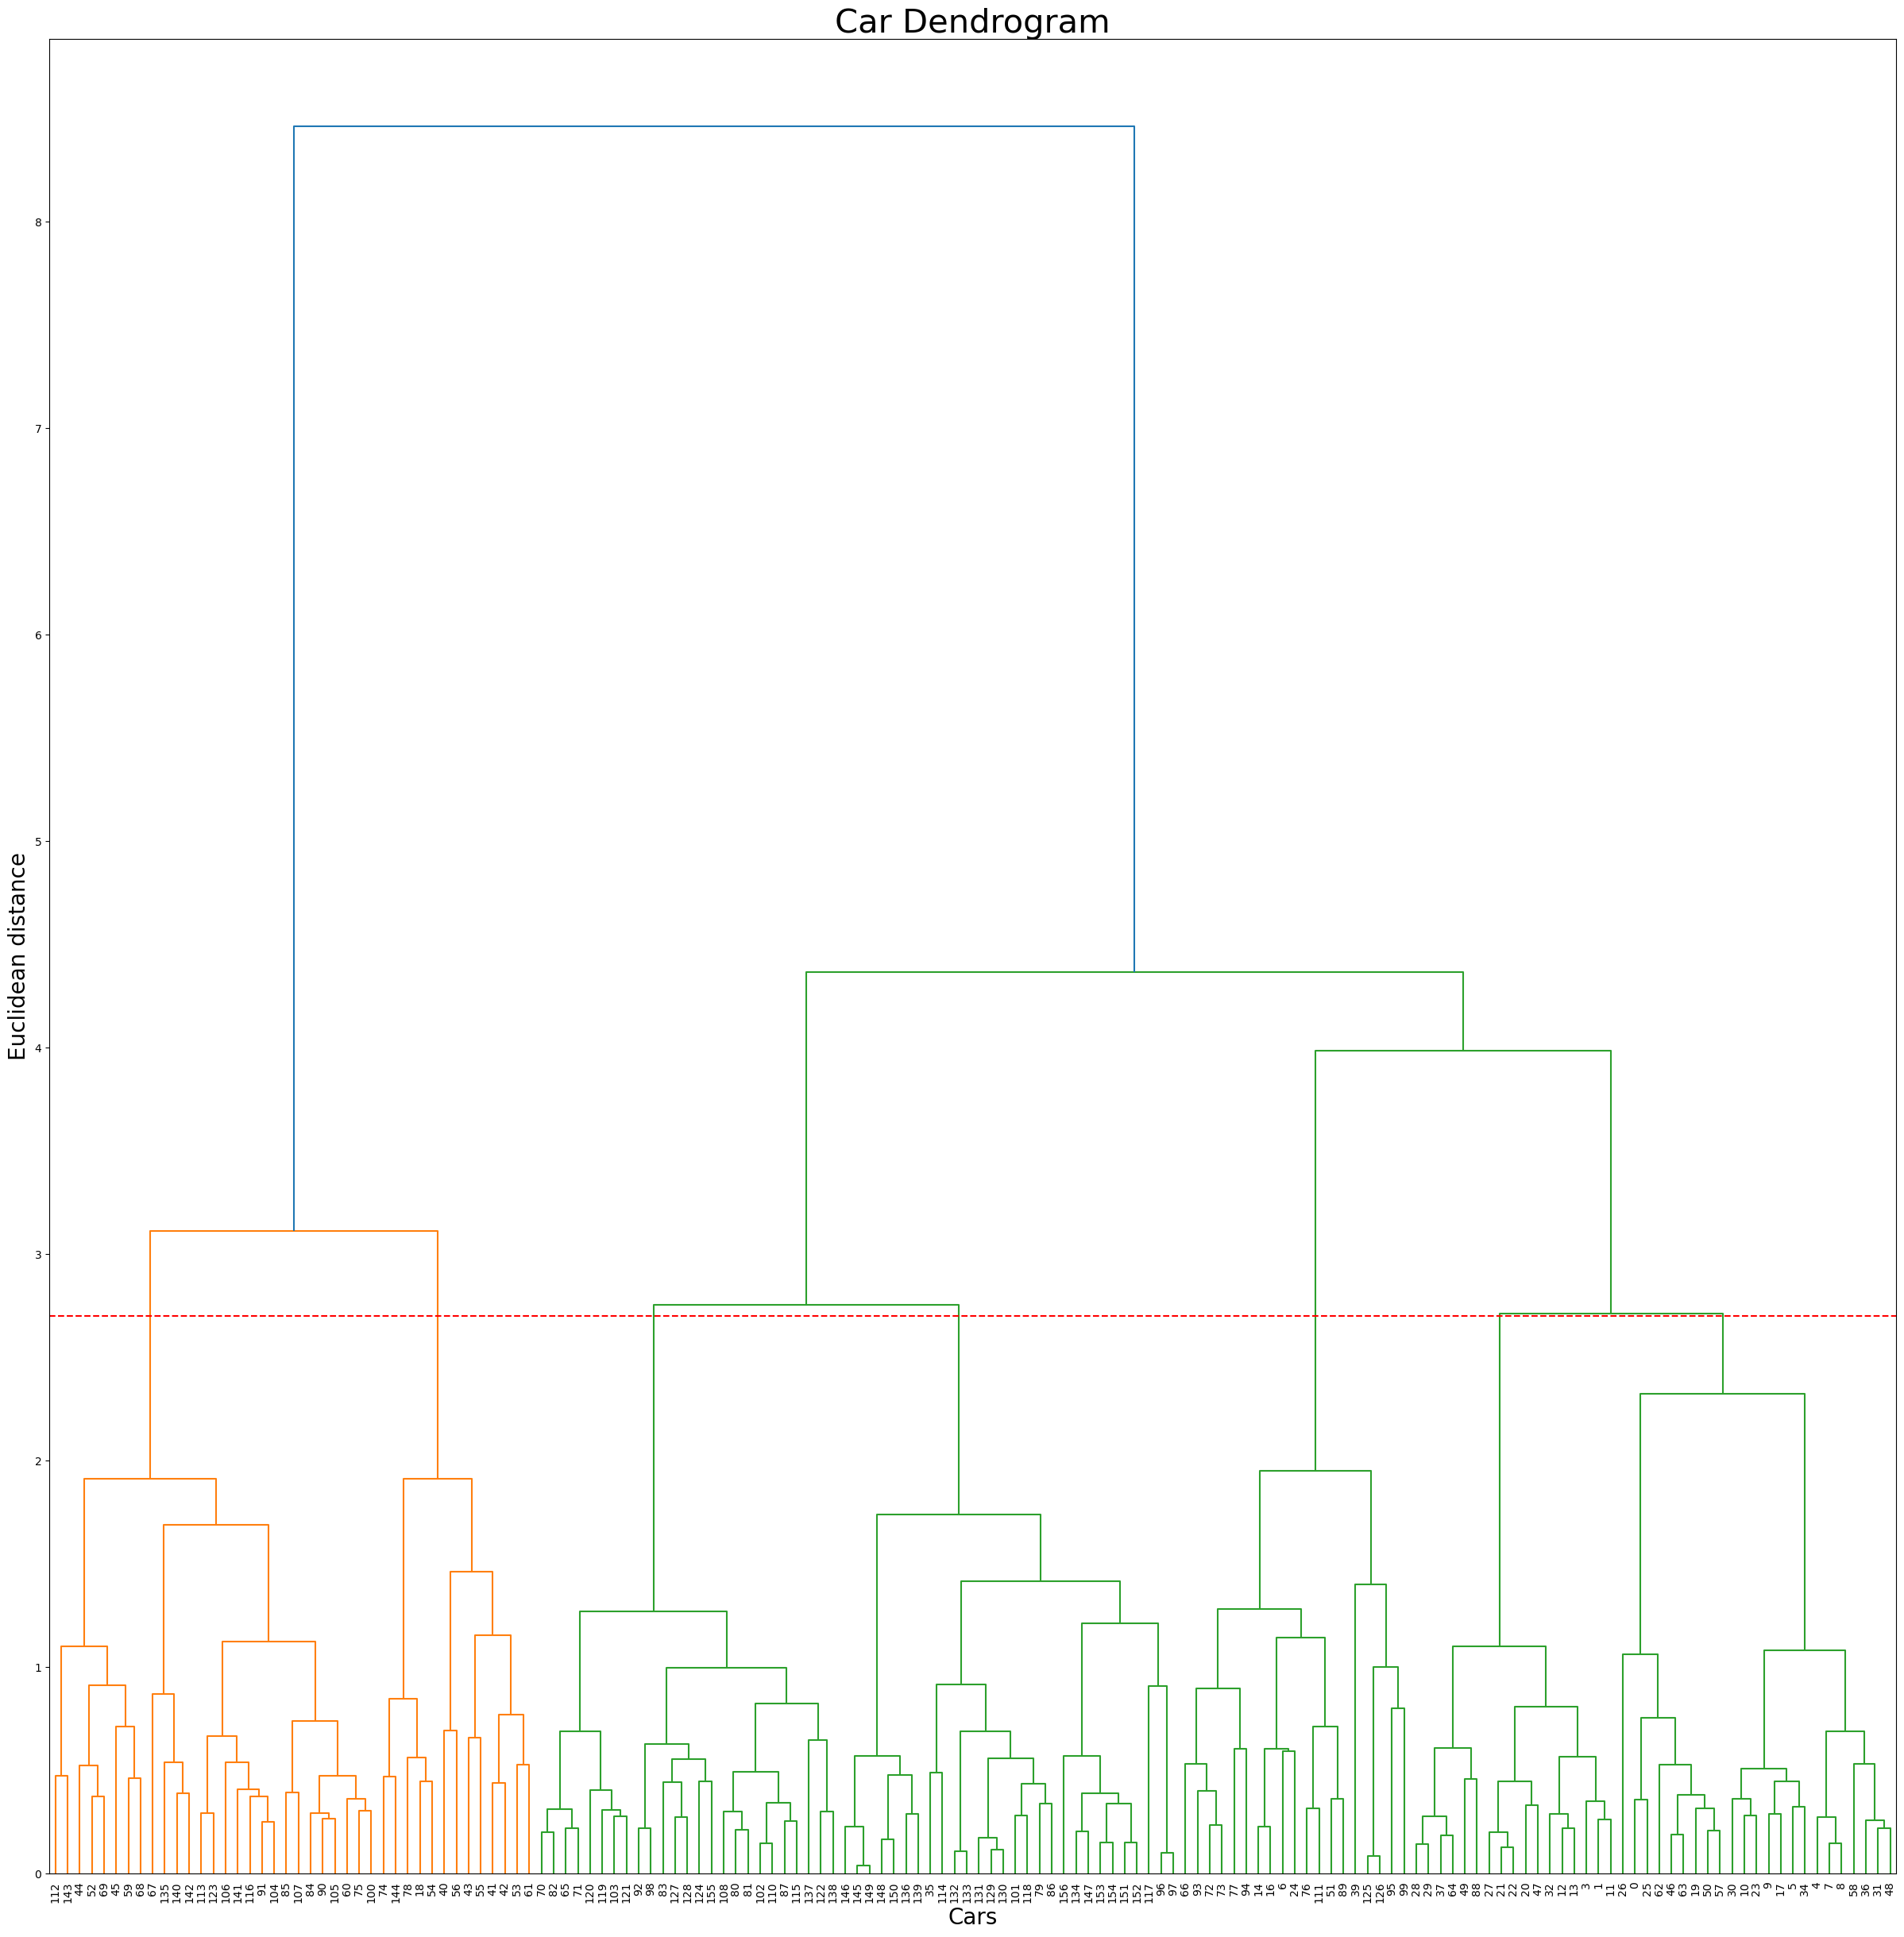

In [21]:
plt.figure(figsize=(30,30))
dendrogrm =dendrogram(linkage(x, method = 'ward'),labels=df.index)
plt.axhline(y=2.7, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Car Dendrogram',fontsize=30)
plt.xlabel('Cars',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

# Task 3

- Compute clustering using the Agglomerative clustering approach. Try different values for the linkage criteria.

- Decide a setting that works well and interpret the clusters you obtain.

In [22]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
y_hc

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 2, 2, 2, 2, 4, 4, 0, 0,
       0, 0, 0, 1, 4, 2, 2, 2, 2, 0, 0, 4, 4, 2, 0, 0, 0, 5, 1, 4, 4, 4,
       5, 5, 1, 1, 2, 4, 1, 1, 2, 3, 5, 5, 5, 5, 4, 4, 3, 5, 0, 1, 4, 4,
       5, 1, 1, 1, 3, 3, 5, 1, 4, 3, 5, 5, 4, 4, 4, 4, 5, 5, 1, 4, 4, 3,
       5, 4, 3, 3, 5, 5, 5, 5, 4, 5, 1, 1, 5, 5, 3, 3, 3, 3, 3, 3, 4, 3,
       5, 5, 3, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3],
      dtype=int64)

In [23]:
hc1 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'single')
y_hc1 = hc.fit_predict(x)
y_hc1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 2, 2, 2, 2, 4, 4, 0, 0,
       0, 0, 0, 1, 4, 2, 2, 2, 2, 0, 0, 4, 4, 2, 0, 0, 0, 5, 1, 4, 4, 4,
       5, 5, 1, 1, 2, 4, 1, 1, 2, 3, 5, 5, 5, 5, 4, 4, 3, 5, 0, 1, 4, 4,
       5, 1, 1, 1, 3, 3, 5, 1, 4, 3, 5, 5, 4, 4, 4, 4, 5, 5, 1, 4, 4, 3,
       5, 4, 3, 3, 5, 5, 5, 5, 4, 5, 1, 1, 5, 5, 3, 3, 3, 3, 3, 3, 4, 3,
       5, 5, 3, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3],
      dtype=int64)

In [24]:
hc2 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'complete')
y_hc2 = hc.fit_predict(x)
y_hc2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 2, 2, 2, 2, 4, 4, 0, 0,
       0, 0, 0, 1, 4, 2, 2, 2, 2, 0, 0, 4, 4, 2, 0, 0, 0, 5, 1, 4, 4, 4,
       5, 5, 1, 1, 2, 4, 1, 1, 2, 3, 5, 5, 5, 5, 4, 4, 3, 5, 0, 1, 4, 4,
       5, 1, 1, 1, 3, 3, 5, 1, 4, 3, 5, 5, 4, 4, 4, 4, 5, 5, 1, 4, 4, 3,
       5, 4, 3, 3, 5, 5, 5, 5, 4, 5, 1, 1, 5, 5, 3, 3, 3, 3, 3, 3, 4, 3,
       5, 5, 3, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3],
      dtype=int64)

In [26]:
hc3 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average')
y_hc3 = hc.fit_predict(x)
y_hc3

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 2, 2, 2, 2, 4, 4, 0, 0,
       0, 0, 0, 1, 4, 2, 2, 2, 2, 0, 0, 4, 4, 2, 0, 0, 0, 5, 1, 4, 4, 4,
       5, 5, 1, 1, 2, 4, 1, 1, 2, 3, 5, 5, 5, 5, 4, 4, 3, 5, 0, 1, 4, 4,
       5, 1, 1, 1, 3, 3, 5, 1, 4, 3, 5, 5, 4, 4, 4, 4, 5, 5, 1, 4, 4, 3,
       5, 4, 3, 3, 5, 5, 5, 5, 4, 5, 1, 1, 5, 5, 3, 3, 3, 3, 3, 3, 4, 3,
       5, 5, 3, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3],
      dtype=int64)

# Task 4

Visualize the all-possible paired feature
clusters and data distributions.

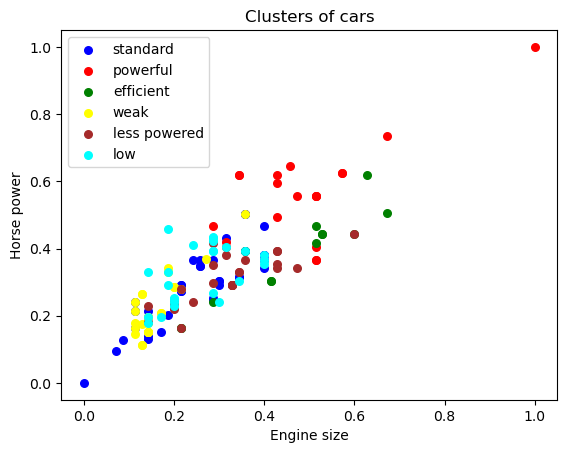

In [28]:
plt.scatter(x[y_hc==0,5],x[y_hc==0,6],s=30,c='blue',label='powerful')
plt.scatter(x[y_hc==1,5],x[y_hc==1,6],s=30,c='red',label='medium powerful')
plt.scatter(x[y_hc==2,5],x[y_hc==2,6],s=30,c='green',label='efficient')
plt.scatter(x[y_hc==3,5],x[y_hc==3,6],s=30,c='yellow',label='weak')
plt.scatter(x[y_hc==4,5],x[y_hc==4,6],s=30,c='brown',label='less powered')
plt.scatter(x[y_hc==5,5],x[y_hc==5,6],s=30,c='cyan',label='low')

plt.title('Clusters of cars')
plt.xlabel('Engine size')
plt.ylabel('Horse power')
plt.legend()
plt.show()

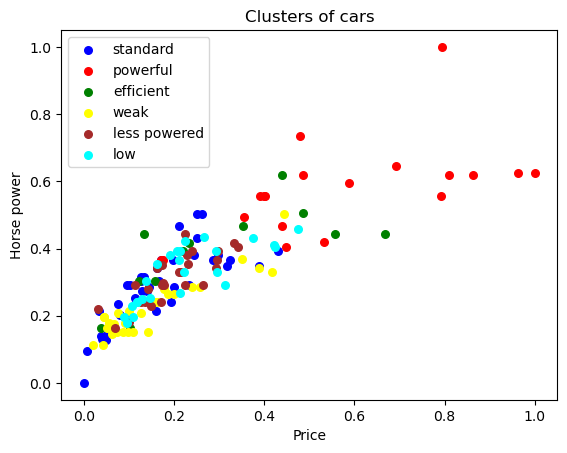

In [29]:
plt.scatter(x[y_hc==0,5],x[y_hc==0,6],s=30,c='blue',label='powerful')
plt.scatter(x[y_hc==1,5],x[y_hc==1,6],s=30,c='red',label='medium powerful')
plt.scatter(x[y_hc==2,5],x[y_hc==2,6],s=30,c='green',label='efficient')
plt.scatter(x[y_hc==3,5],x[y_hc==3,6],s=30,c='yellow',label='weak')
plt.scatter(x[y_hc==4,5],x[y_hc==4,6],s=30,c='brown',label='less powered')
plt.scatter(x[y_hc==5,5],x[y_hc==5,6],s=30,c='cyan',label='low')

plt.title('Clusters of cars')
plt.xlabel('Engine size')
plt.ylabel('Horse power')
plt.legend()
plt.show()

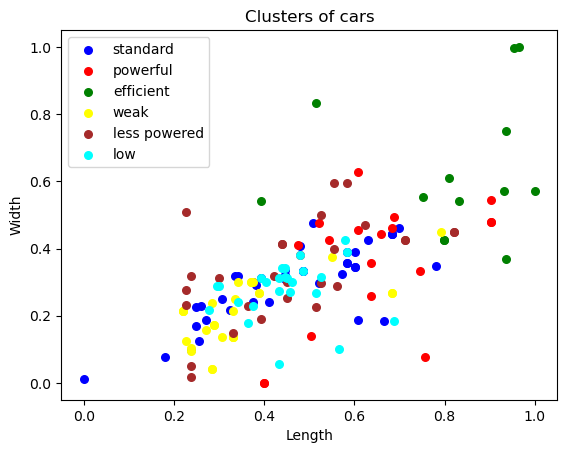

In [30]:
plt.scatter(x[y_hc==0,5],x[y_hc==0,6],s=30,c='blue',label='powerful')
plt.scatter(x[y_hc==1,5],x[y_hc==1,6],s=30,c='red',label='medium powerful')
plt.scatter(x[y_hc==2,5],x[y_hc==2,6],s=30,c='green',label='efficient')
plt.scatter(x[y_hc==3,5],x[y_hc==3,6],s=30,c='yellow',label='weak')
plt.scatter(x[y_hc==4,5],x[y_hc==4,6],s=30,c='brown',label='less powered')
plt.scatter(x[y_hc==5,5],x[y_hc==5,6],s=30,c='cyan',label='low')

plt.title('Clusters of cars')
plt.xlabel('Engine size')
plt.ylabel('Horse power')
plt.legend()
plt.show()